In [49]:
import pandas as pd
import numpy as np
%matplotlib inline 
from matplotlib import pyplot as plt
import cv2
import os

In [97]:
file_path_organic = './DATASET/TRAIN/O/'
file_path_recyclable = './DATASET/TRAIN/R/'

organic_files = os.listdir(file_path_organic)
recyclable_files = os.listdir(file_path_recyclable)

#read in organic images
organic_imgs = np.array([])

org_error_count = 0
for img in organic_files:
    image = cv2.imread(file_path_organic + img, cv2.IMREAD_GRAYSCALE)
    try:
        image = cv2.resize(image, dsize=(225,225), interpolation=cv2.INTER_NEAREST)
        np.append(organic_imgs, image.flatten())
    except:
        org_error_count += 1

# org_target = np.full_like(organic_imgs.shape[0],0)
org_target = pd.series(data='organic', )
    
#read in recyclable images
recyclable_imgs = np.array([])
rec_error_count = 0
for img in recyclable_files:
    image = cv2.imread(file_path_recyclable + img, cv2.IMREAD_GRAYSCALE)
    try:
        image = cv2.resize(image, dsize=(225,225), interpolation=cv2.INTER_NEAREST)
        np.append(recyclable_imgs,image.flatten())
    except:
        rec_error_count += 1

rec_target = np.full_like(recyclable_imgs.shape[0], 'recyclable')

h, w = (225,225)

print("{} Organic images failed to resize".format(org_error_count))
print("Organic Image size:", organic_imgs[0][0].shape)
print("Organic Image Count:", len(organic_imgs))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("{} Recyclable images failed to resize".format(rec_error_count))
print("Recyclable Image size:", recyclable_imgs[0][0].shape)
print("Recyclable Image Count:", len(recyclable_imgs))

ValueError: invalid literal for int() with base 10: 'organic'

In [86]:
# a helper plotting function
def plot_gallery(images, title, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h,w)), cmap=plt.cm.gray)
        plt.title(title[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [96]:
#create dataframe for each dataset
organic_imgs.shape
#org_df = pd.DataFrame(organic_imgs, columns=['Image','Class'])

#rec_df = pd.DataFrame(recyclable_imgs, columns=['Image','Class'])

AttributeError: 'list' object has no attribute 'shape'

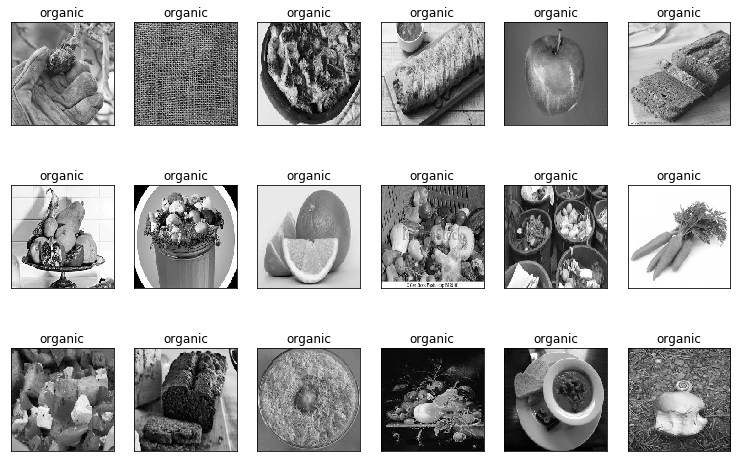

In [88]:
#plot organic images
plot_gallery(org_df['Image'], org_df['Class'], h, w)

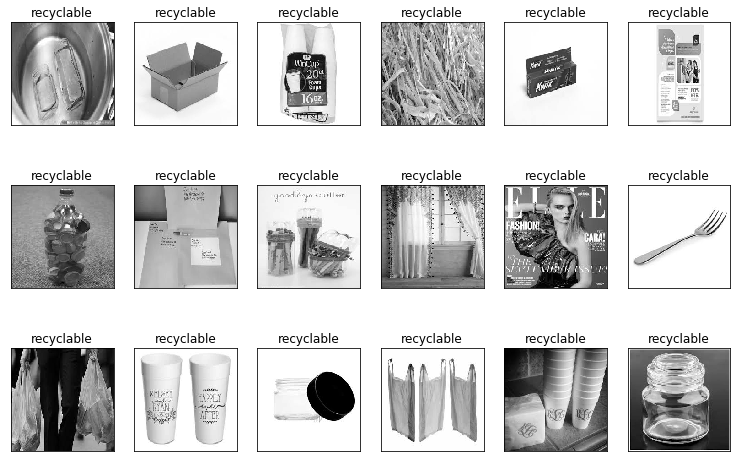

In [89]:
#plot recyclable images
plot_gallery(rec_df['Image'], rec_df['Class'], h, w)

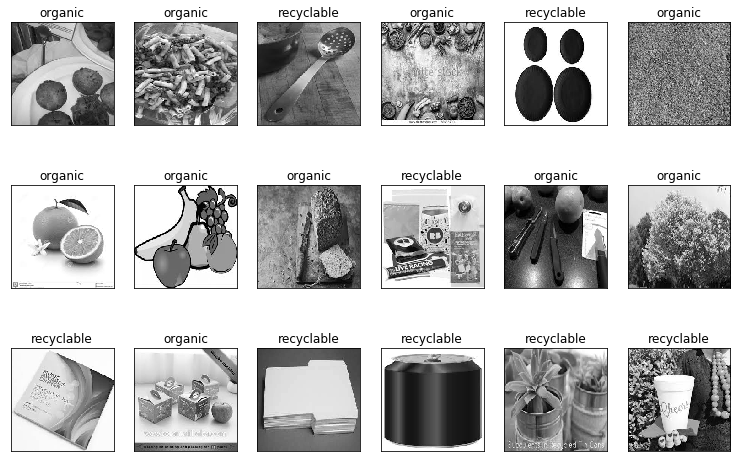

In [90]:
#combine both dataframes 
X = org_df.append(rec_df)

#shuffle X
X = X.sample(frac=1).reset_index(drop=True)

plot_gallery(X['Image'],X['Class'], h, w)

In [95]:
X.head()

,Image,Class
0,"[47, 47, 48, 49, 50, 50, 51, 51, 47, 44, 52, 4...",organic
1,"[90, 90, 91, 92, 94, 95, 97, 97, 98, 99, 100, ...",organic
2,"[91, 91, 89, 86, 83, 82, 82, 83, 85, 86, 87, 8...",recyclable
3,"[144, 156, 144, 138, 192, 158, 72, 64, 228, 22...",organic
4,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",recyclable


In [93]:
from sklearn.decomposition import PCA

n_components = 300
print ("Extracting the top %d eigenfaces from %d faces" % (
    n_components, X.shape[0]))

pca = PCA(n_components=n_components)
pca.fit(X.copy())
#eigenfaces = pca.components_.reshape((n_components, h, w))

Extracting the top 300 eigenfaces from 22564 faces


ValueError: setting an array element with a sequence.